In [16]:
import pandas as pd 
from os import path
import time
from pytrends.request import TrendReq

In [17]:
# Dictionary of google regions with id and name 

regions_id_google = {'Nord_Pas_de_Calais':'O',
            'Picardie':'S',
            'Haute_Normandie':'Q',
            'Ile_de_France':'J',
            'Corse':'H',
            'PACA':'U',
            'Languedoc_Roussillon':'K',
            'Midi_Pyrénées':'N',
            'Aquitaine':'B',
            'Rhône_Alpes':'V',
            'Auvergne':'C', 
            'Limousin':'L',
            'Poitou_Charente':'T',
            'Basse_Normandie':'P',
            'Bretagne':'E',
            'Pays_de_la_Loire':'R',
            'Alsace':'A',
            'Lorraine':'M',
            'Champagne_Ardennes':'G',
            'Centre_Val_de_Loire':'F',
            'Bourgogne':'D',
            'Franche_Comté':'I'}


    
# Create dataframe for each region

region_df = regions_id_google.copy()
for reg in regions_id_google.keys():
    region_df[reg]=pd.DataFrame()

In [153]:
#We selected 40 keywords rank by correlation
keywords40 = ["Auto-test","Isolement","Symptômes","Contagion","Fièvre","Contact tracing","Autotests COVID","Essoufflement","Maux de tête","Toux",
              "Système immunitaire","Diarrhée","Urgences","Fatigue","Dépression","Hôpital","Variant omicron","Anxiété","Gamma","Soins à domicile",
              "Voyages","Green Pass","Télétravail","Coronavirus","Soins intensifs","Tests PCR","Tests antigéniques","Certificat sanitaire",
              "Ventilation","Perte de goût","Frontières","Quarantaine","Restrictions","Distanciation sociale","Alpha","Chômage","Gel hydroalcoolique","Réanimation","Aéroports"]
df2 = keywords40
print(type(df2))

<class 'list'>


In [317]:
merged_df = pd.read_csv('/Users/chengyichen/Desktop/merged_df.csv')
incidence = pd.read_csv('/Users/chengyichen/Desktop/incidence.csv')
incidence = incidence.rename(columns={"Code": "region"})
incidence = incidence.drop(columns=["Unnamed: 0"])
incidence 

region      week        date        P        pop   incidence
0         A  2020-S20  2020-05-11    15000  189581100    7.912181
1         A  2020-S21  2020-05-18    18200  189581100    9.600113
2         A  2020-S22  2020-05-25    16700  189581100    8.808895
3         A  2020-S23  2020-06-01     8300  189581100    4.378074
4         A  2020-S24  2020-06-08     6700  189581100    3.534108
...     ...       ...         ...      ...        ...         ...
2479      V  2022-S18  2022-04-25  2425200  667111000  363.537702
2480      V  2022-S19  2022-05-02  2041100  667111000  305.961077
2481      V  2022-S20  2022-05-09  1536700  667111000  230.351471
2482      V  2022-S21  2022-05-16   999600  667111000  149.840132
2483      V  2022-S22  2022-05-23  1271100  667111000  190.538006

[2484 rows x 6 columns]

In [109]:
import pandas as pd
from datetime import datetime, timedelta

merged_df['date'] = pd.to_datetime(merged_df['date'])  
merged_df['date'] = merged_df['date'] + timedelta(days=1)  
merged_df = merged_df.drop(columns=["Unnamed: 0"])
merged_df= merged_df[merged_df['date'] != '2020-05-04']
merged_df= merged_df[merged_df['date'] != '2022-05-30']
merged_df

date  Auto-test  Isolement  Symptômes  Contagion  Fièvre  \
1    2020-05-11       36.0          9         41          7      86   
2    2020-05-18       33.0          6         31         14      60   
3    2020-05-25       37.0         14         34         26      41   
4    2020-06-01        0.0          5         29         12      36   
5    2020-06-08       28.0          6         23         23      21   
...         ...        ...        ...        ...        ...     ...   
2392 2022-04-25        0.0         10         61         25      15   
2393 2022-05-02        0.0         13         65         25      20   
2394 2022-05-09       38.0          0         57         23      49   
2395 2022-05-16        0.0          7         60         26      21   
2396 2022-05-23        0.0          9         77         38      34   

      Contact tracing  Autotests COVID  Essoufflement  Maux de tête  ...  \
1                 0.0              0.0              0            17  ...   
2                 0.0              0.0             39             0  ...   
3               100.0             75.0             23            69  ...   
4                 0.0              0.0              0            31  ...   
5                 0.0              0.0              0             0  ...   
...               ...              ...            ...           ...  ...   
2392              0.0              0.0              0             0  ...   
2393              0.0              0.0            100            30  ...   
2394              0.0              0.0             57            63  ...   
2395              0.0              0.0              0            57  ...   
2396              0.0              0.0              0            37  ...   

      Quarantaine  Restrictions  Distanciation sociale  Alpha  Chômage  \
1               0             0                      0     47      100   
2               0             0                     22     63       60   
3              51             0                      0     62       62   
4              40             0                     21     44       56   
5              61            18                      0     66       50   
...           ...           ...                    ...    ...      ...   
2392            0             0                      0     49       41   
2393            0            19                      0     59       22   
2394           12            14                      0     36        9   
2395            0            24                      0     62       29   
2396           21             0                     19     50       12   

      Gel hydroalcoolique  Réanimation  Aéroports  region  region name  
1                      92           61         22       M     Lorraine  
2                      68           33         36       M     Lorraine  
3                      48            0         23       M     Lorraine  
4                      29           31          0       M     Lorraine  
5                      19           38          0       M     Lorraine  
...                   ...          ...        ...     ...          ...  
2392                    0           15          0       A       Alsace  
2393                    0            0          0       A       Alsace  
2394                    9            0         62       A       Alsace  
2395                    6            0          0       A       Alsace  
2396                    0            0          0       A       Alsace  

[2354 rows x 42 columns]

In [110]:
import pandas as pd
import datetime


date_list = incidence['week']


new_date_list = []
for date_str in date_list:
    year, week_num = date_str.split("-S")
    week_num = int(week_num)

    first_day_of_year = datetime.datetime(int(year), 1, 1)
    first_day_of_week = first_day_of_year - datetime.timedelta(days=first_day_of_year.weekday())

    delta = datetime.timedelta(weeks=week_num-1)
    result_date = first_day_of_week + delta

    result_str = result_date.strftime("%Y-%m-%d")
    new_date_list.append(result_str)

incidence['date'] = new_date_list



In [111]:
cols = incidence.columns.tolist()
new_cols = ['region', 'week', 'date','P','pop','incidence']
cols_reordered = [c for c in new_cols if c in cols]
incidence = incidence.reindex(columns=cols_reordered)

print(incidence)
incidence.to_csv('/Users/chengyichen/Desktop/incidence.csv')

     region      week        date        P        pop   incidence
0         A  2020-S20  2020-05-11    15000  189581100    7.912181
1         A  2020-S21  2020-05-18    18200  189581100    9.600113
2         A  2020-S22  2020-05-25    16700  189581100    8.808895
3         A  2020-S23  2020-06-01     8300  189581100    4.378074
4         A  2020-S24  2020-06-08     6700  189581100    3.534108
...     ...       ...         ...      ...        ...         ...
2479      V  2022-S18  2022-04-25  2425200  667111000  363.537702
2480      V  2022-S19  2022-05-02  2041100  667111000  305.961077
2481      V  2022-S20  2022-05-09  1536700  667111000  230.351471
2482      V  2022-S21  2022-05-16   999600  667111000  149.840132
2483      V  2022-S22  2022-05-23  1271100  667111000  190.538006

[2484 rows x 6 columns]


In [164]:
merged_df['date'] = merged_df['date'].astype(str)
final= pd.merge(merged_df,incidence, on=['date', 'region'], how='inner') 
new_cols = list(final.columns[:1]) + list(final.columns[-6:]) + list(final.columns[1:-6])
final = final.reindex(columns=new_cols)
final.to_csv('/Users/chengyichen/Desktop/full_data_set.csv')


In [166]:
df_all = pd.read_csv('/Users/chengyichen/Desktop/full_data_set.csv')
df_all_gr = df_all.groupby(['region'])['pop','incidence'].mean()
df_all.drop(columns=["Unnamed: 0"])

/var/folders/w3/v_7zxn855qd1kj4wqy68swd80000gn/T/ipykernel_89347/3460328792.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_all_gr = df_all.groupby(['region'])['pop','incidence'].mean()


date region region name      week       P        pop   incidence  \
0     2020-05-11      M    Lorraine  2020-S20   24200  230742500   10.487882   
1     2020-05-18      M    Lorraine  2020-S21   37800  230742500   16.381898   
2     2020-05-25      M    Lorraine  2020-S22   18100  230742500    7.844242   
3     2020-06-01      M    Lorraine  2020-S23   26700  230742500   11.571340   
4     2020-06-08      M    Lorraine  2020-S24   23700  230742500   10.271190   
...          ...    ...         ...       ...     ...        ...         ...   
2371  2022-04-25      A      Alsace  2022-S18  821400  189581100  433.271038   
2372  2022-05-02      A      Alsace  2022-S19  618700  189581100  326.351097   
2373  2022-05-09      A      Alsace  2022-S20  386200  189581100  203.712290   
2374  2022-05-16      A      Alsace  2022-S21  258700  189581100  136.458750   
2375  2022-05-23      A      Alsace  2022-S22  358800  189581100  189.259372   

      Auto-test  Isolement  Symptômes  Contagion  Fièvre  Contact tracing  \
0          36.0          9         41          7      86              0.0   
1          33.0          6         31         14      60              0.0   
2          37.0         14         34         26      41            100.0   
3           0.0          5         29         12      36              0.0   
4          28.0          6         23         23      21              0.0   
...         ...        ...        ...        ...     ...              ...   
2371        0.0         10         61         25      15              0.0   
2372        0.0         13         65         25      20              0.0   
2373       38.0          0         57         23      49              0.0   
2374        0.0          7         60         26      21              0.0   
2375        0.0          9         77         38      34              0.0   

      Autotests COVID  Essoufflement  Maux de tête  Toux  Système immunitaire  \
0                 0.0              0            17    26                    0   
1                 0.0             39             0    20                    0   
2                75.0             23            69    17                   31   
3                 0.0              0            31    21                   29   
4                 0.0              0             0    12                   58   
...               ...            ...           ...   ...                  ...   
2371              0.0              0             0    50                   40   
2372              0.0            100            30    56                   17   
2373              0.0             57            63    46                    0   
2374              0.0              0            57    43                   60   
2375              0.0              0            37    46                    0   

      Diarrhée  Urgences  Fatigue  Dépression  Hôpital  Variant omicron  \
0           53        29       42          34       35                0   
1           33        47       37          31       47                0   
2           47        52       43           0       60                0   
3           40        32       70          33       77                0   
4           45        47       45          20       43                0   
...        ...       ...      ...         ...      ...              ...   
2371        54        48       81           0       79                0   
2372        51        66       64          87       67                8   
2373        50        33       66          37       90                0   
2374        31        83       79          83       86                0   
2375        73        73       92          35       64                0   

      Anxiété  Gamma  Soins à domicile  Voyages  Green Pass  Télétravail  \
0           0     32               0.0       38         0.0           52   
1          13     42               0.0       28        25.0           43   
2          10     61    

In [137]:
df_all_gr["pop"] = df_all_gr["pop"].apply(lambda x: '{:.2f}'.format(float(x)))
df_all_gr['pop'] = df_all_gr['pop'].astype(float) / 100
df_all_gr

pop   incidence
region                        
A        1895811.0  413.710857
B        3467317.0  383.202685
C        1361267.0  371.690083
D        1612402.0  360.138454
E        2258306.0  338.080353
F        2559073.0  343.821333
G        1308511.0  366.800155
H         344679.0  392.310806
I        1170637.0  398.318276
J       12278210.0  417.597516
K        2852604.0  397.659082
L         727380.0  349.781509
M        2307425.0  388.631467
N        4154327.0  404.351049
O        4041766.0  419.830002
P        1459025.0  353.799817
Q        1844475.0  369.216273
R        3801797.0  370.896730
S        1920896.0  365.167648
T        1805285.0  337.932176
U        5055651.0  455.071079
V        6671110.0  433.640146

In [146]:

import matplotlib.pyplot as plt
import seaborn as sns
from  pprint  import  pprint
sns.set()

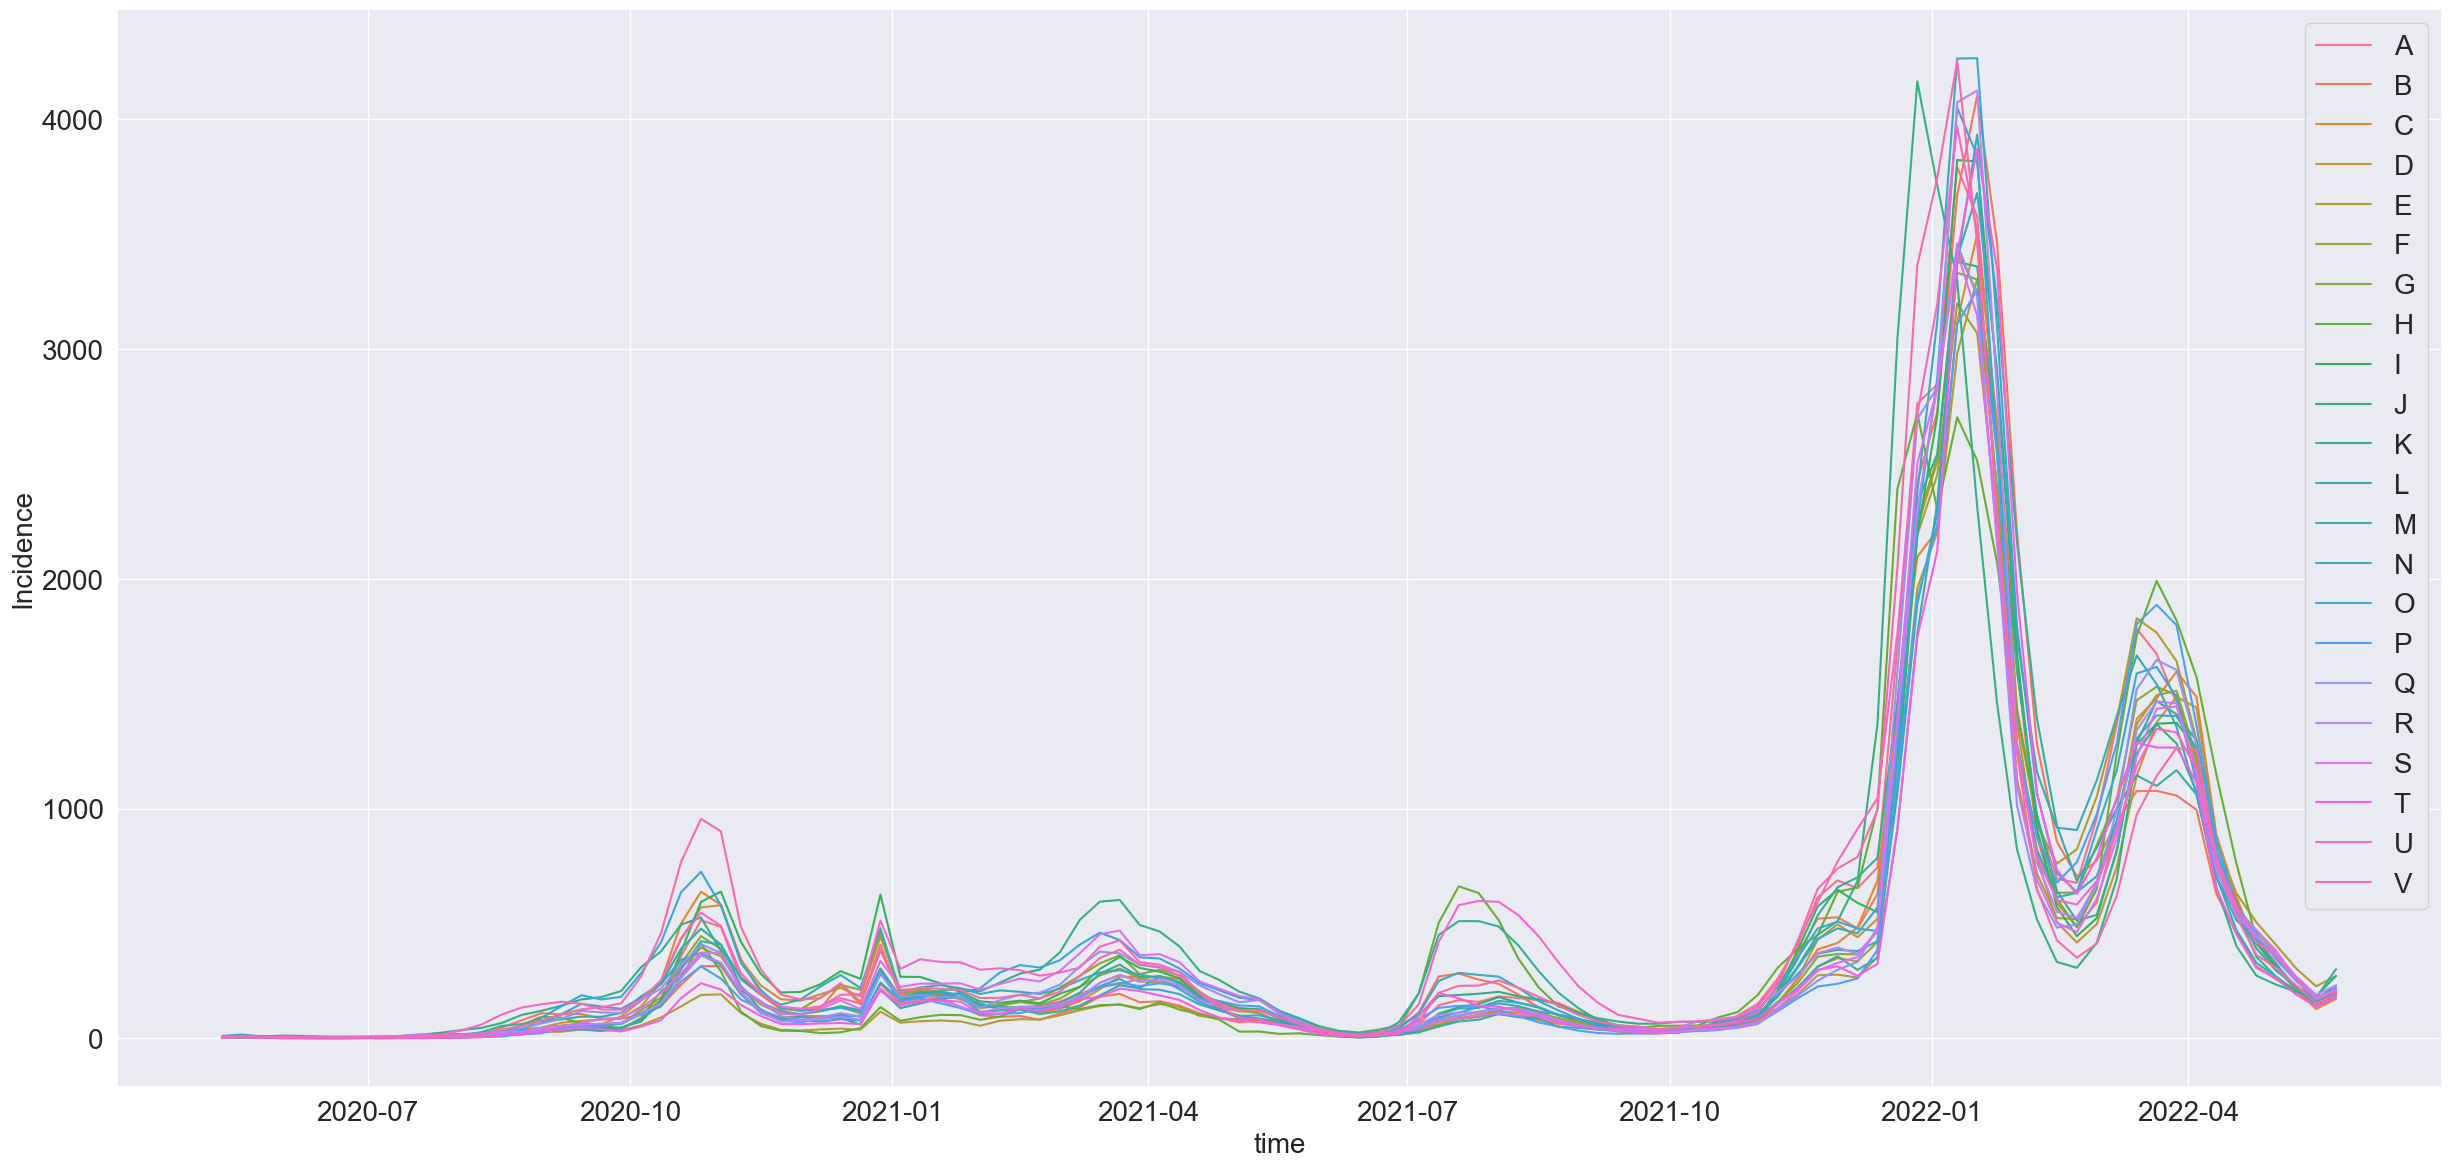

In [150]:
plt.figure(figsize = (30,14))
sns.lineplot(x="date",y="incidence",hue="region",data=df_all_gr) 
plt.xlabel('time',fontsize = 20)
plt.ylabel('Incidence',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1),fontsize = 20)
plt.show()

In [180]:
# Most popular words searched when incidence peaked
df_al = df_all.reset_index()
df_all

date region region name      week       P        pop   incidence  \
0     2020-05-11      M    Lorraine  2020-S20   24200  230742500   10.487882   
1     2020-05-18      M    Lorraine  2020-S21   37800  230742500   16.381898   
2     2020-05-25      M    Lorraine  2020-S22   18100  230742500    7.844242   
3     2020-06-01      M    Lorraine  2020-S23   26700  230742500   11.571340   
4     2020-06-08      M    Lorraine  2020-S24   23700  230742500   10.271190   
...          ...    ...         ...       ...     ...        ...         ...   
2371  2022-04-25      A      Alsace  2022-S18  821400  189581100  433.271038   
2372  2022-05-02      A      Alsace  2022-S19  618700  189581100  326.351097   
2373  2022-05-09      A      Alsace  2022-S20  386200  189581100  203.712290   
2374  2022-05-16      A      Alsace  2022-S21  258700  189581100  136.458750   
2375  2022-05-23      A      Alsace  2022-S22  358800  189581100  189.259372   

      Auto-test  Isolement  Symptômes  Contagion  Fièvre  Contact tracing  \
0          36.0          9         41          7      86              0.0   
1          33.0          6         31         14      60              0.0   
2          37.0         14         34         26      41            100.0   
3           0.0          5         29         12      36              0.0   
4          28.0          6         23         23      21              0.0   
...         ...        ...        ...        ...     ...              ...   
2371        0.0         10         61         25      15              0.0   
2372        0.0         13         65         25      20              0.0   
2373       38.0          0         57         23      49              0.0   
2374        0.0          7         60         26      21              0.0   
2375        0.0          9         77         38      34              0.0   

      Autotests COVID  Essoufflement  Maux de tête  Toux  Système immunitaire  \
0                 0.0              0            17    26                    0   
1                 0.0             39             0    20                    0   
2                75.0             23            69    17                   31   
3                 0.0              0            31    21                   29   
4                 0.0              0             0    12                   58   
...               ...            ...           ...   ...                  ...   
2371              0.0              0             0    50                   40   
2372              0.0            100            30    56                   17   
2373              0.0             57            63    46                    0   
2374              0.0              0            57    43                   60   
2375              0.0              0            37    46                    0   

      Diarrhée  Urgences  Fatigue  Dépression  Hôpital  Variant omicron  \
0           53        29       42          34       35                0   
1           33        47       37          31       47                0   
2           47        52       43           0       60                0   
3           40        32       70          33       77                0   
4           45        47       45          20       43                0   
...        ...       ...      ...         ...      ...              ...   
2371        54        48       81           0       79                0   
2372        51        66       64          87       67                8   
2373        50        33       66          37       90                0   
2374        31        83       79          83       86                0   
2375        73        73       92          35       64                0   

      Anxiété  Gamma  Soins à domicile  Voyages  Green Pass  Télétravail  \
0           0     32               0.0       38         0.0           52   
1          13     42               0.0       28        25.0           43   
2          10     61    

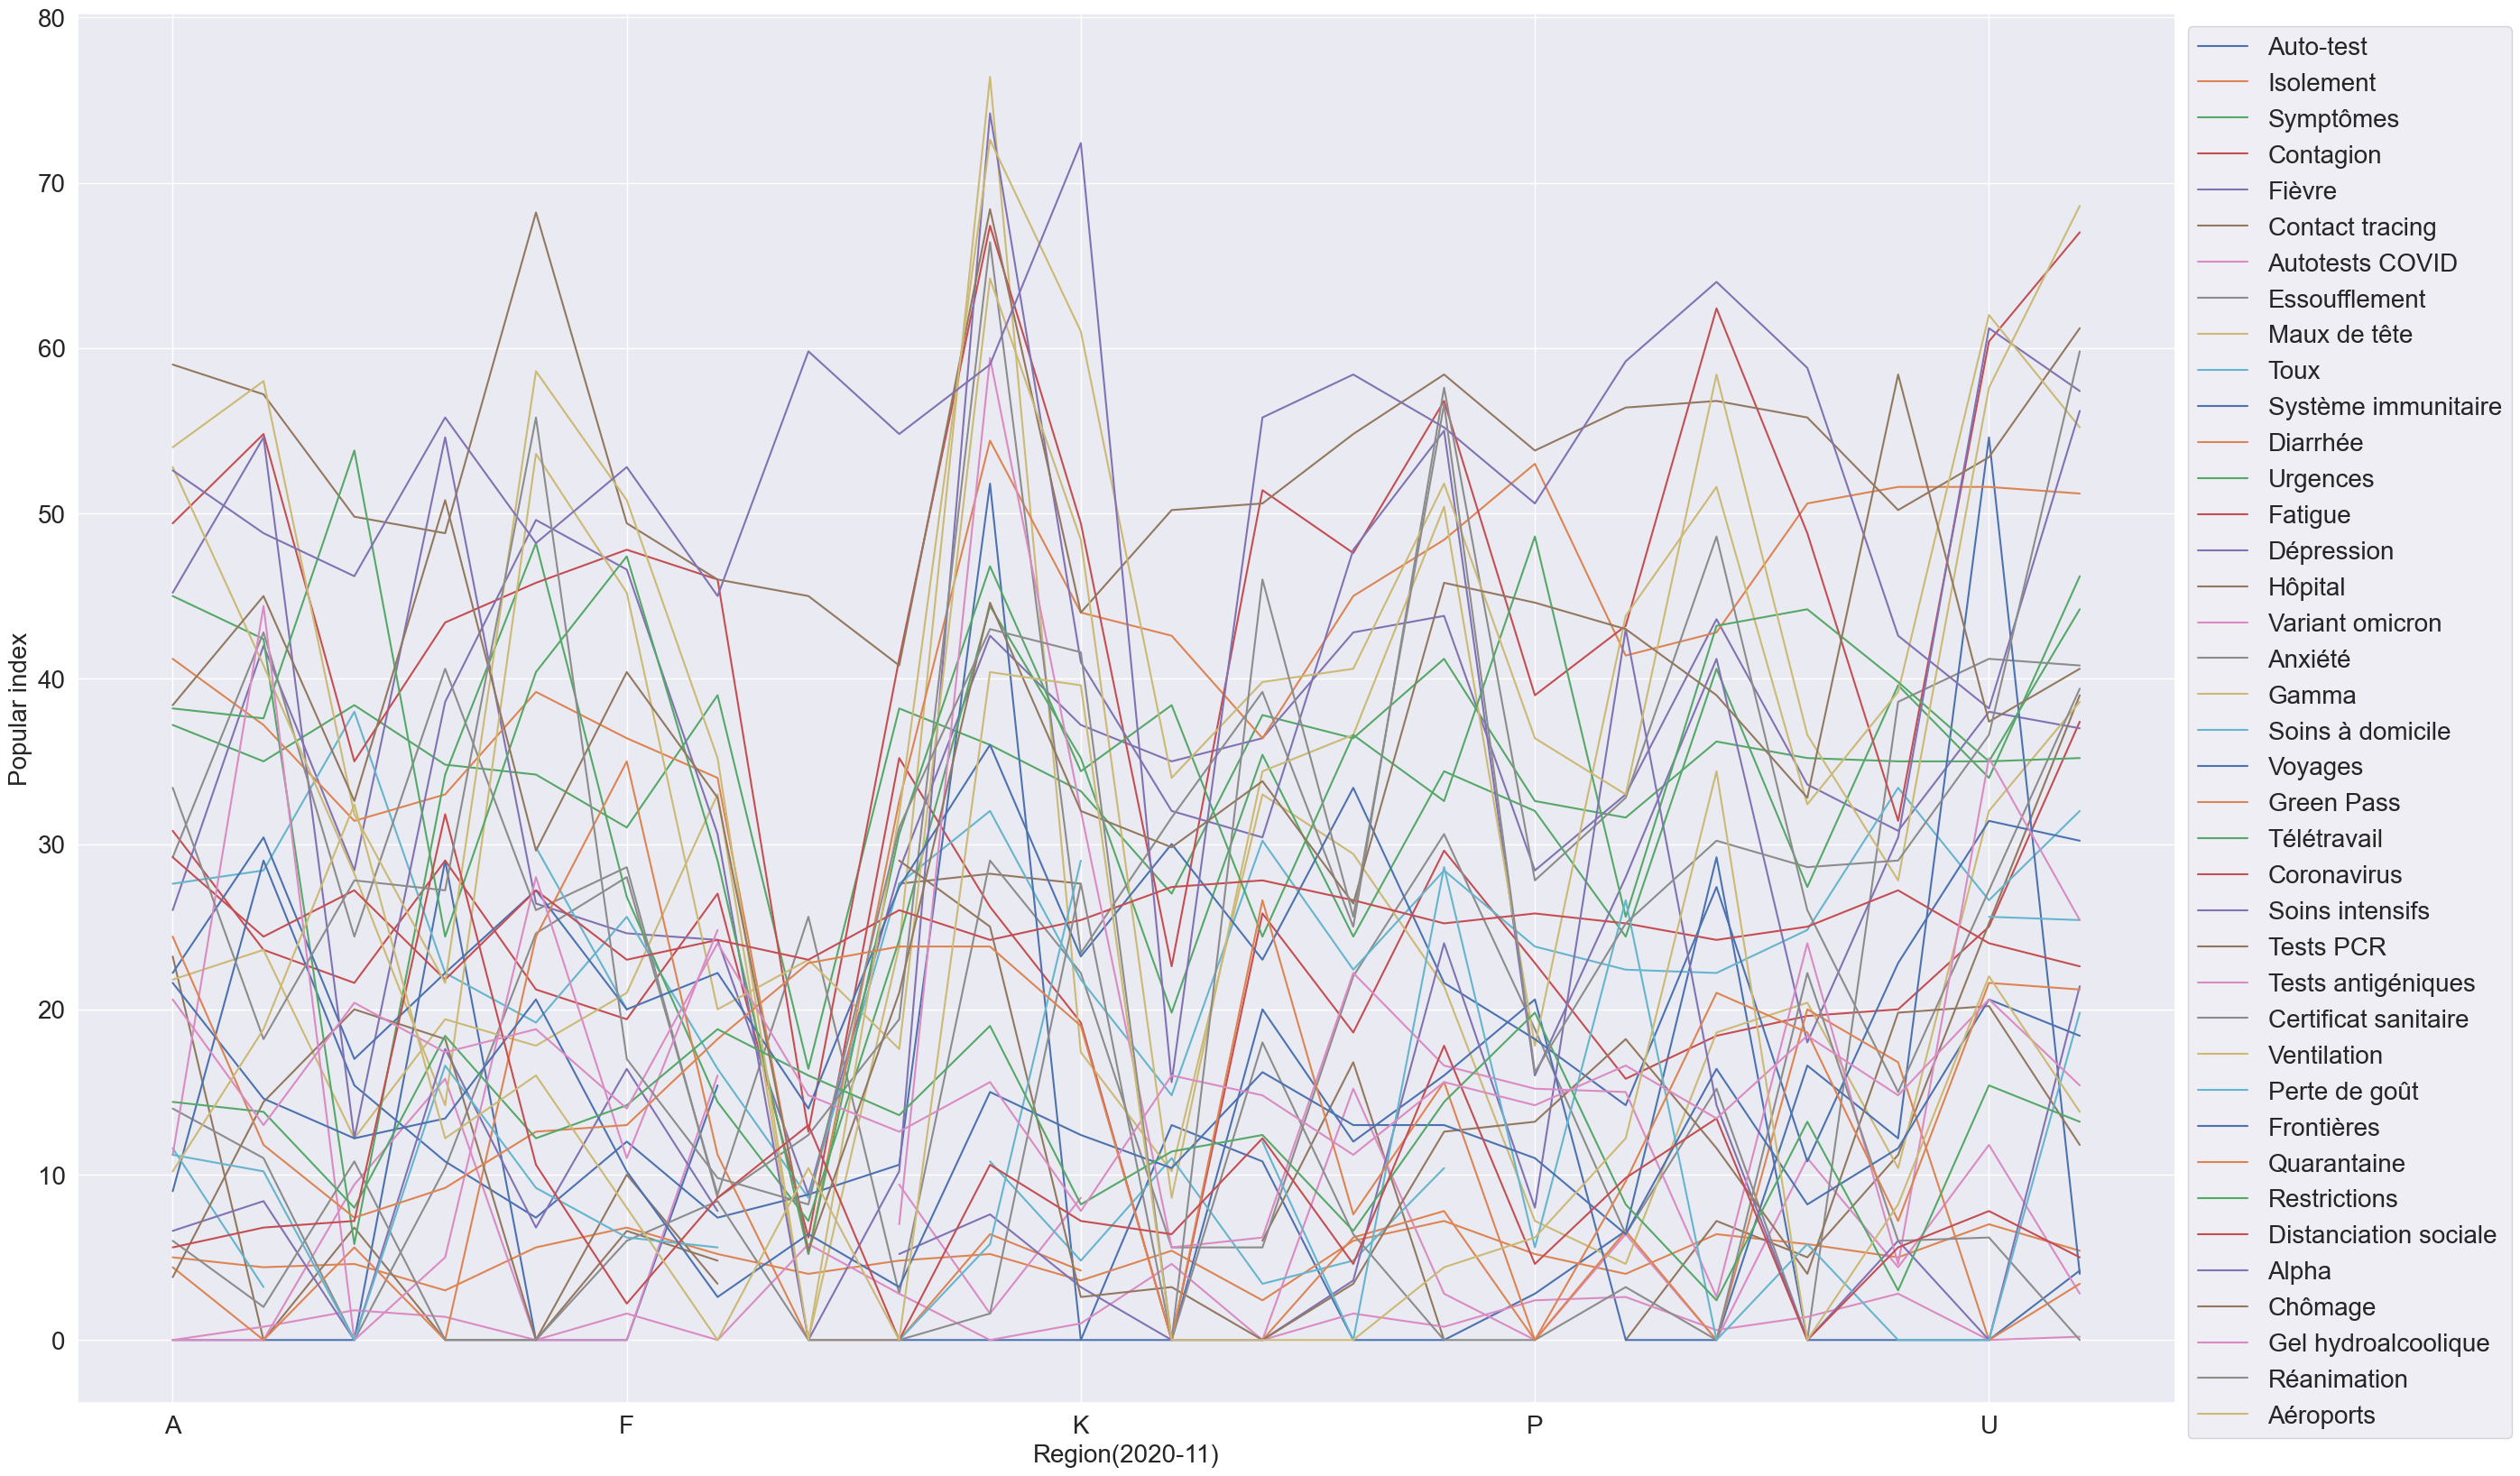

In [187]:
df_firstpeak = df_all.loc[(df_all['date'] >= '2020-11-01') & (df_all['date'] <= '2020-11-30')]
pd.set_option('display.max_columns',None)
df_firstpeak = df_firstpeak.groupby(['region'])[keywords40].mean()
df_firstpeak.plot(figsize = (30,20))
plt.xlabel('Region(2020-11)',fontsize = 20)
plt.ylabel('Popular index',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20 )
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1),fontsize = 20)
plt.show()


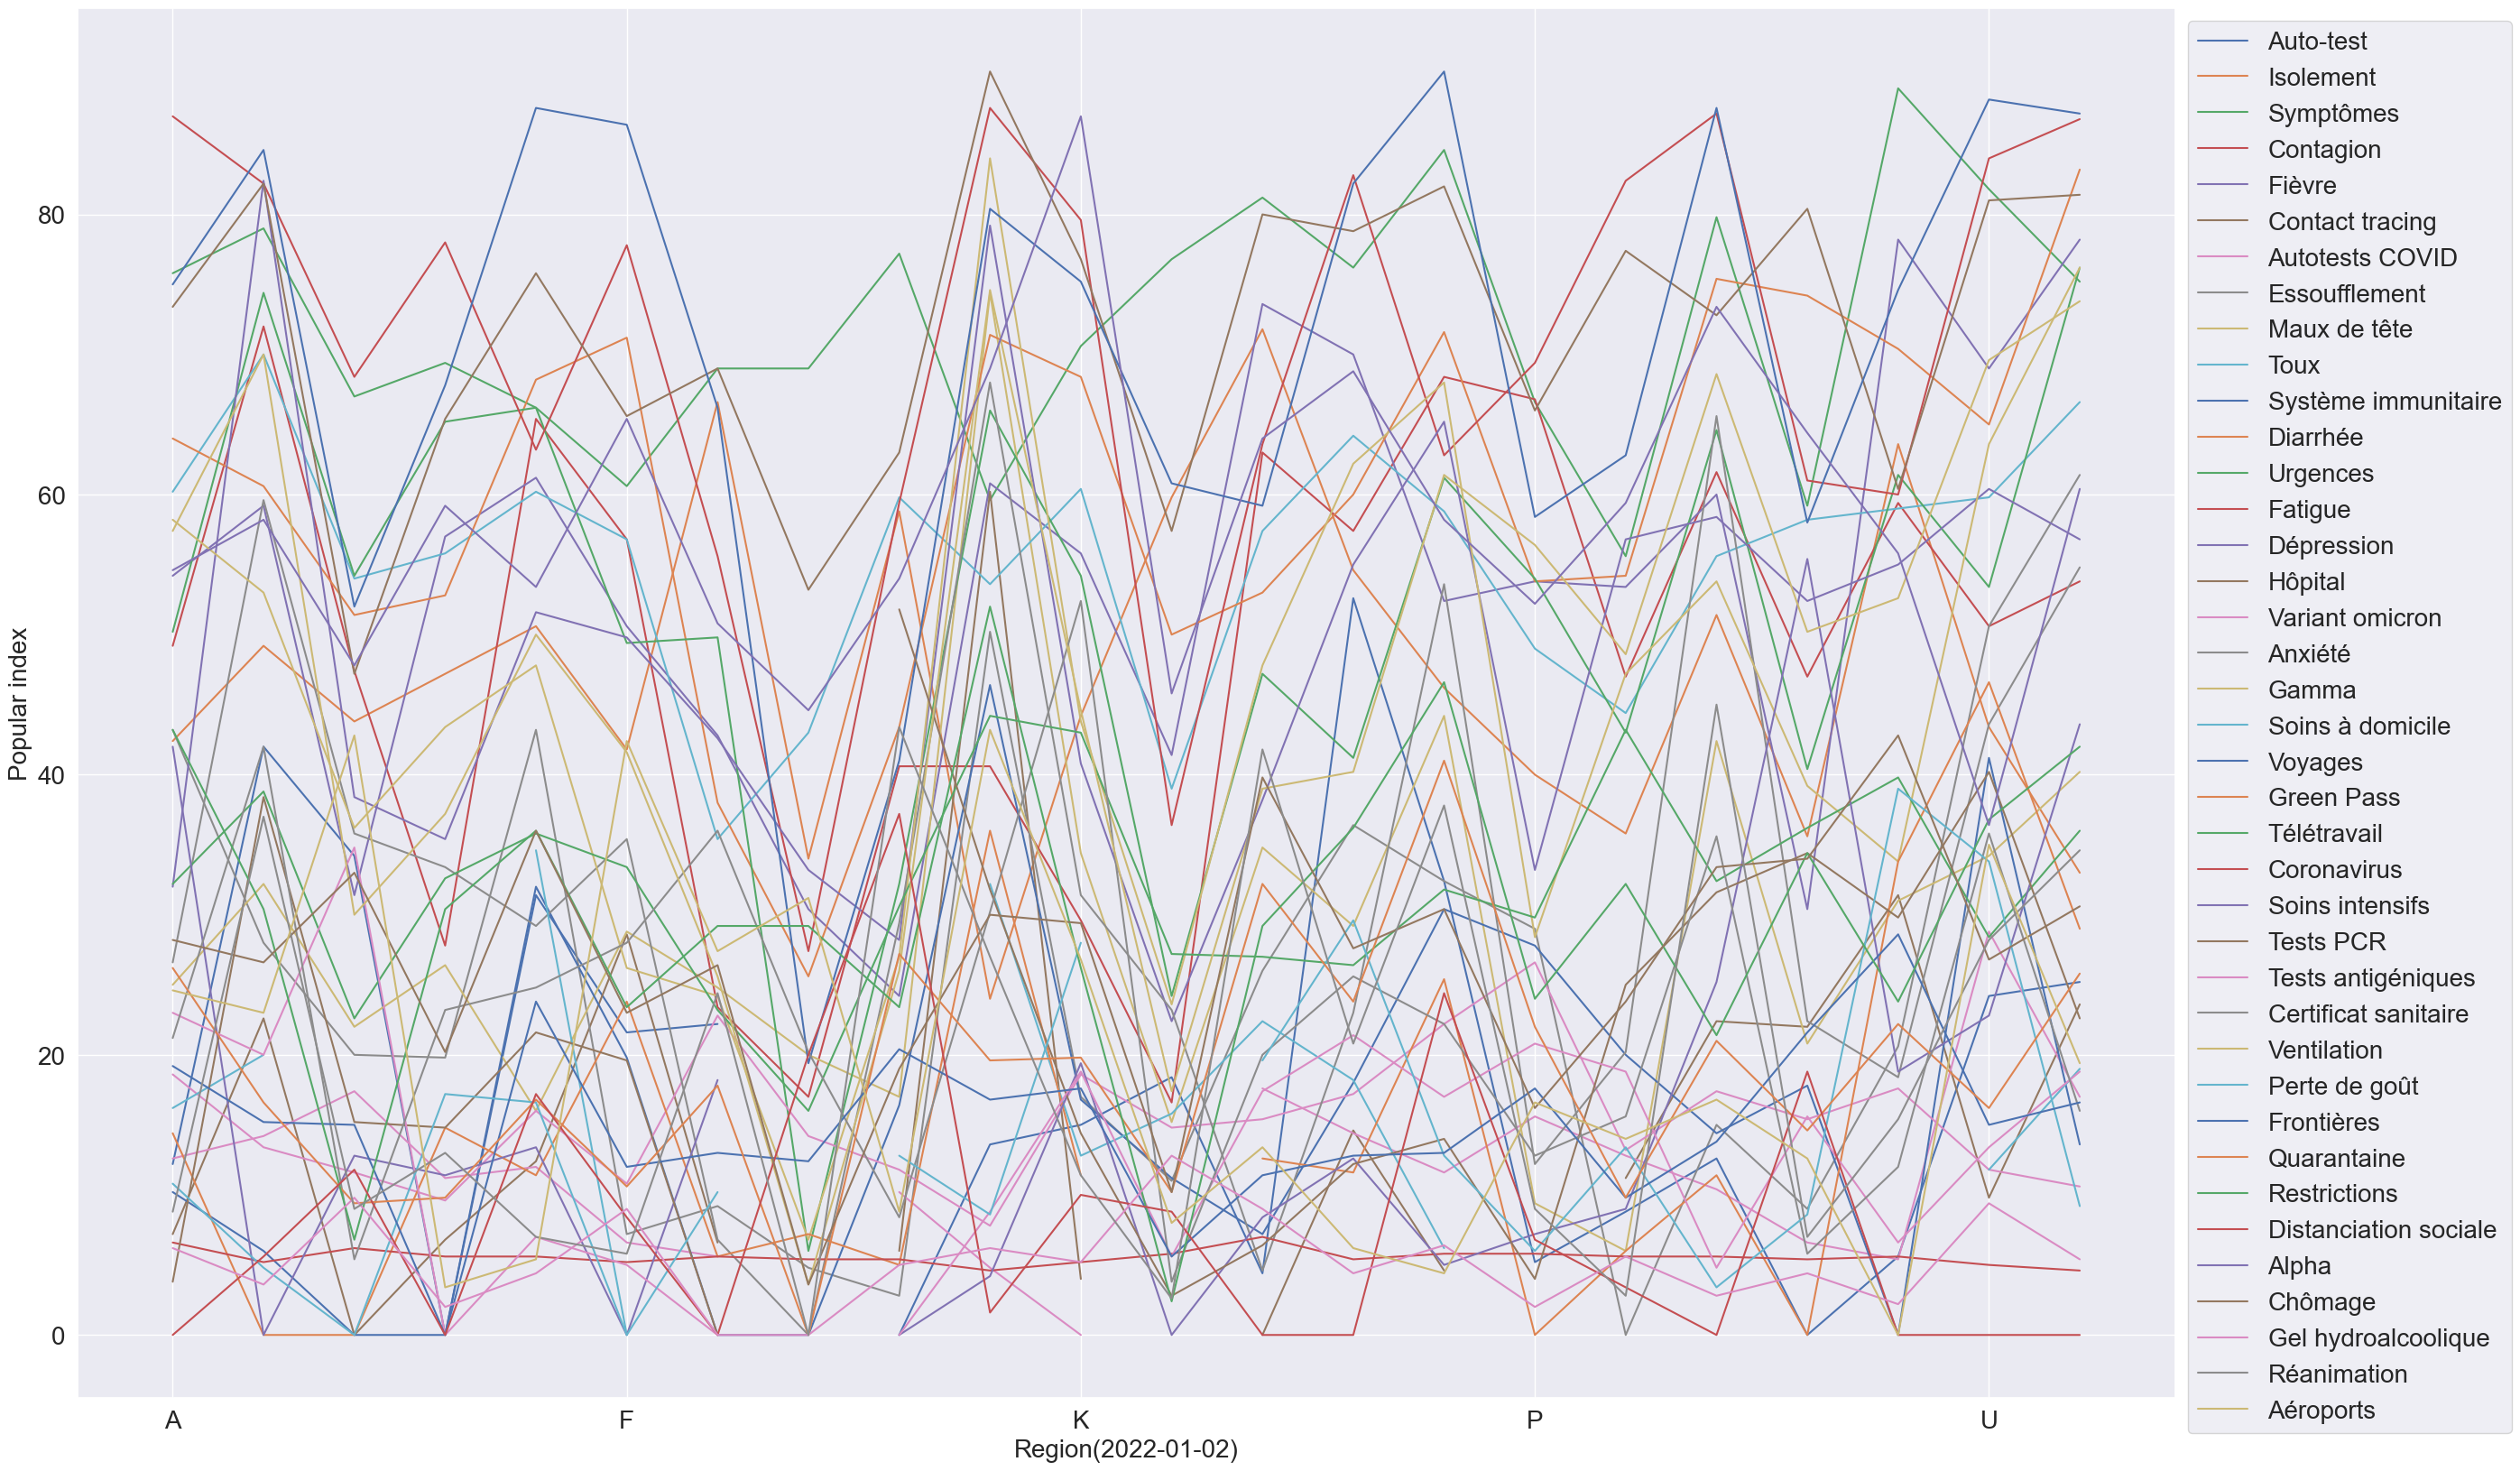

In [189]:
df_secondpeak =  df_all.loc[(df_all['date'] >= '2022-01-15') & (df_all['date'] <= '2022-02-15')]
#among our keywords, test antigenique, parapharmacie, fievre, has the most poplar research during the cases peak period
pd.set_option('display.max_columns',None)
df_secondpeak = df_secondpeak.groupby(['region'])[keywords40].mean()
df_secondpeak.plot(figsize = (30,20)) 
plt.xlabel('Region(2022-01-02)',fontsize = 20)
plt.ylabel('Popular index',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20 )
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1),fontsize = 20)
plt.show()

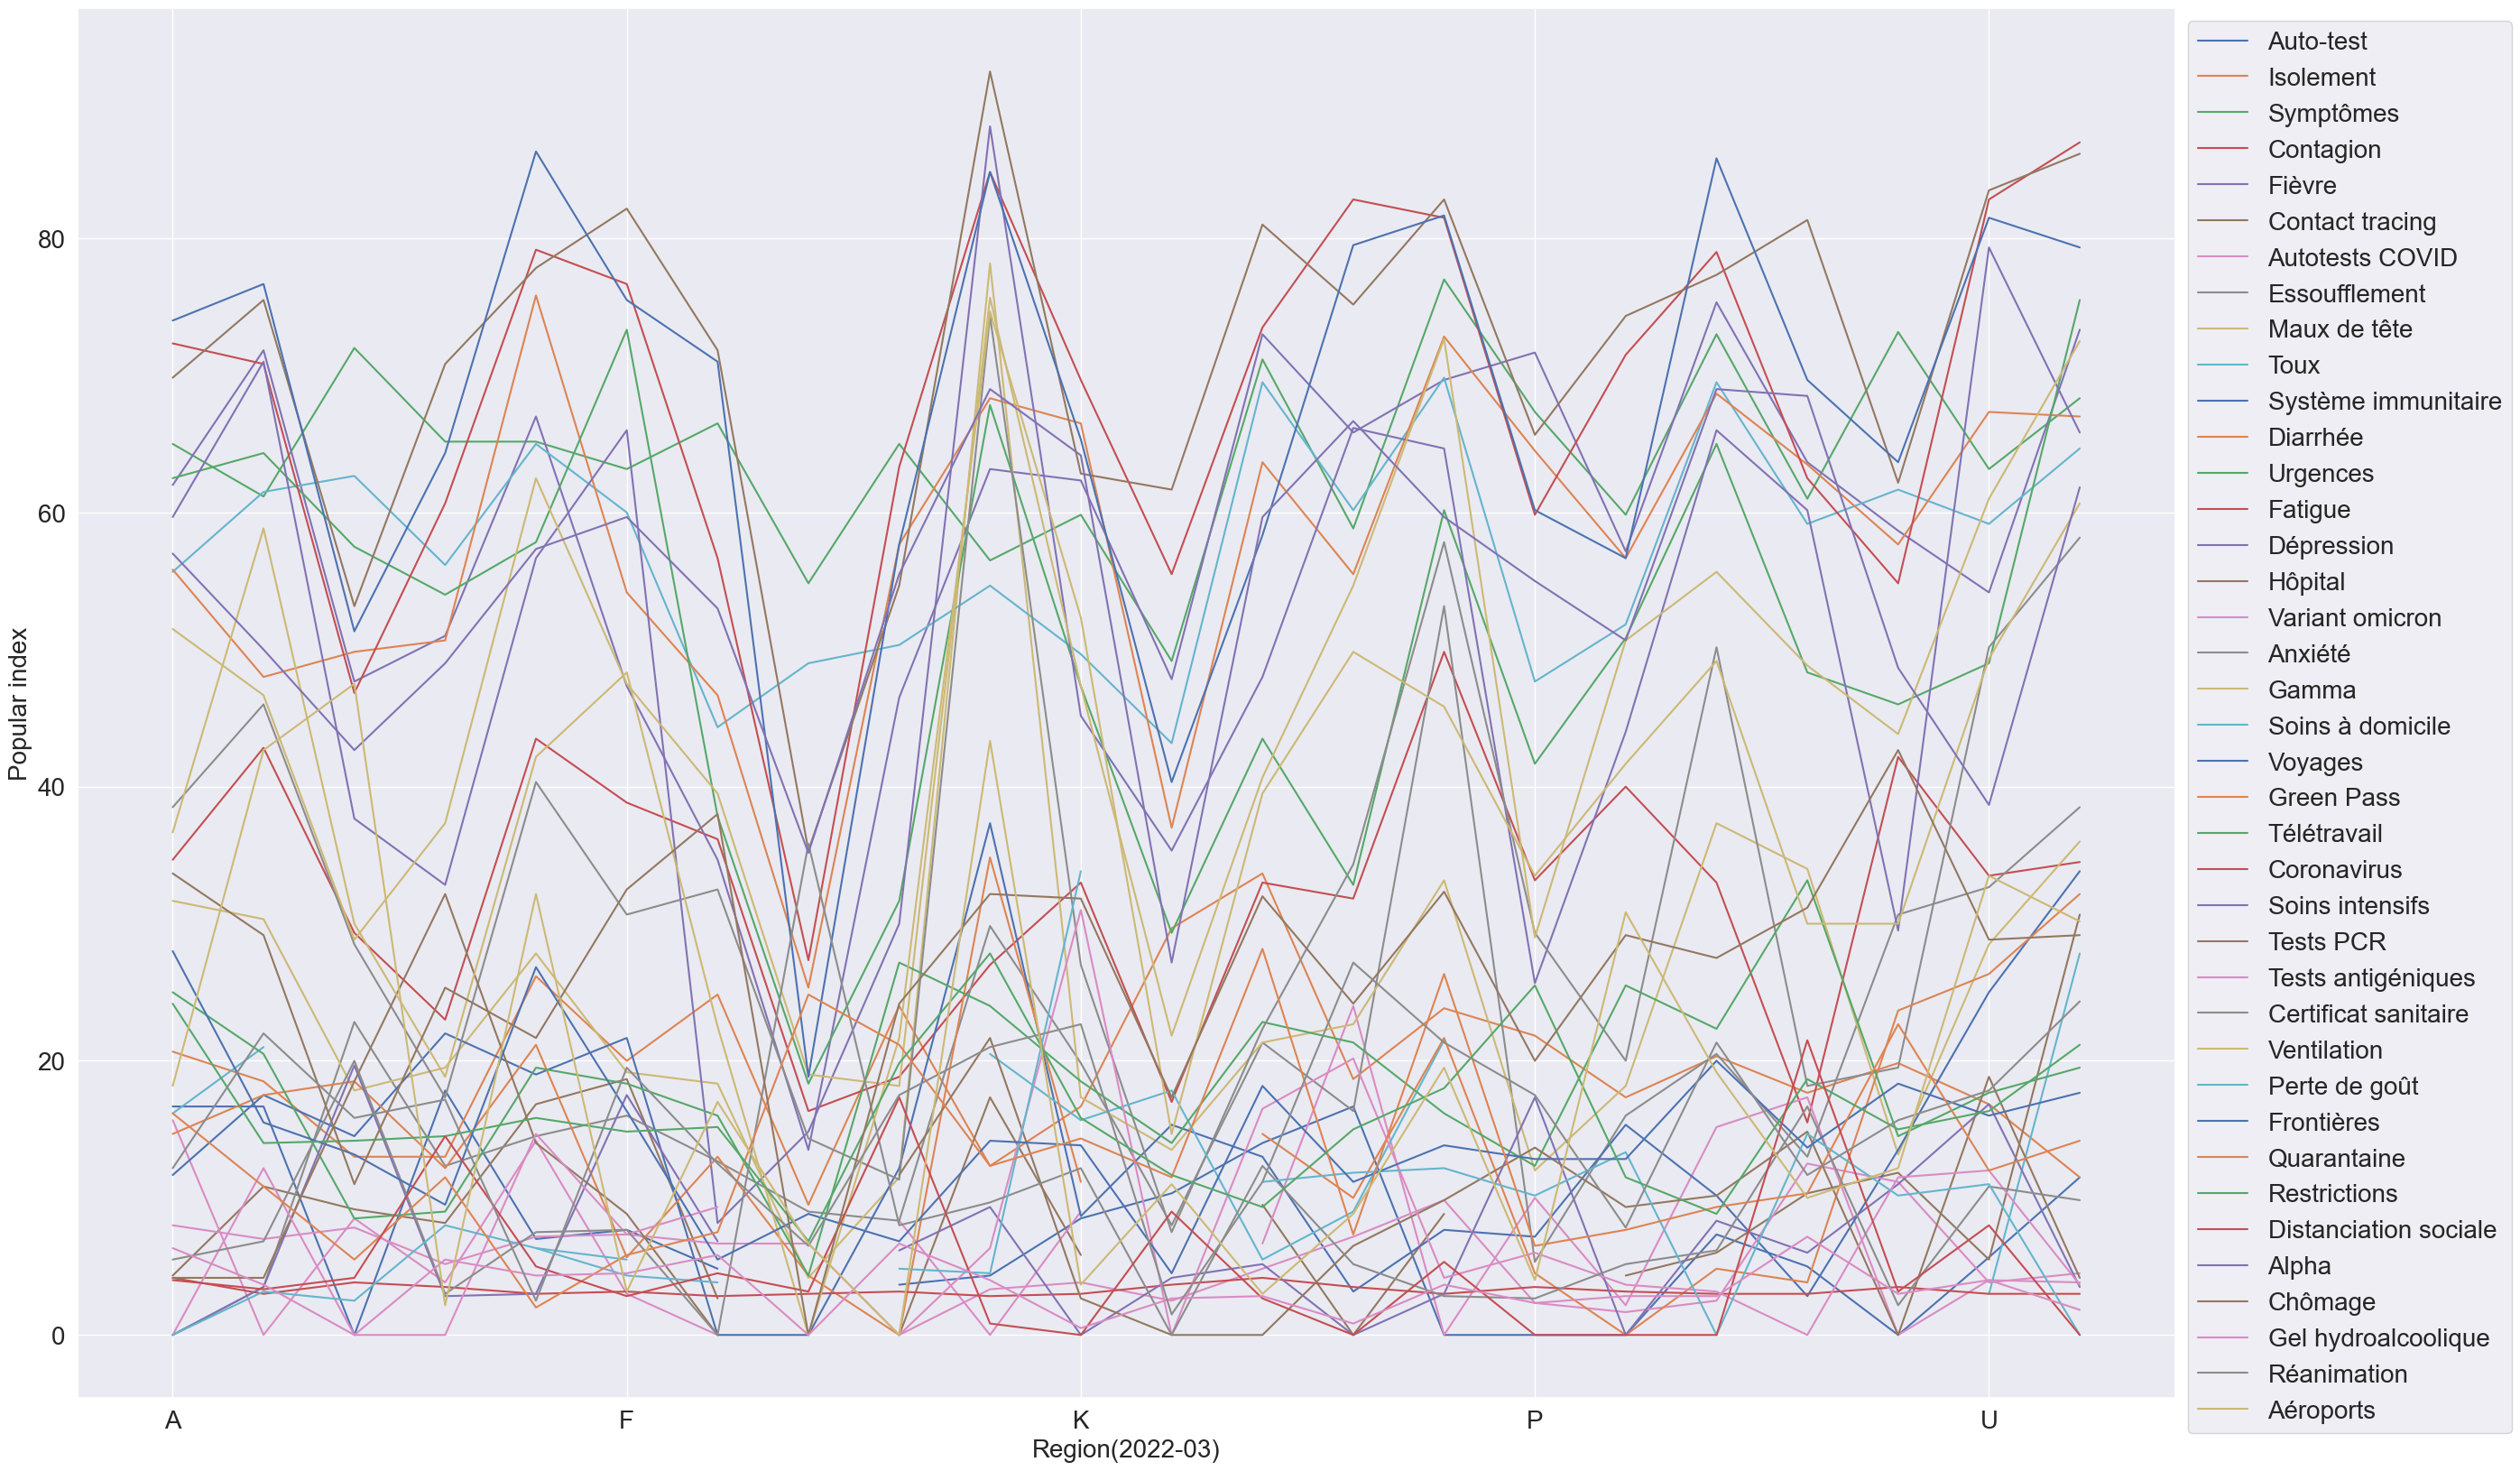

In [190]:
df_thirdpeak =  df_all.loc[(df_all['date'] >= '2022-02-15') & (df_all['date'] <= '2022-03-31')]
#among our keywords, test antigenique, parapharmacie, fievre, has the most poplar research during the cases peak period
pd.set_option('display.max_columns',None)
df_thirdpeak = df_thirdpeak.groupby(['region'])[keywords40].mean()
df_thirdpeak.plot(figsize = (30,20)) 
plt.xlabel('Region(2022-03)',fontsize = 20)
plt.ylabel('Popular index',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20 )
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1),fontsize = 20)
plt.show()

# Model Selection

In [308]:
df_all = pd.read_csv('/Users/chengyichen/Desktop/full_data_set.csv')
df_all = df_all.set_index('date')
df_all

Unnamed: 0 region region name      week       P        pop  \
date                                                                     
2020-05-11           0      M    Lorraine  2020-S20   24200  230742500   
2020-05-18           1      M    Lorraine  2020-S21   37800  230742500   
2020-05-25           2      M    Lorraine  2020-S22   18100  230742500   
2020-06-01           3      M    Lorraine  2020-S23   26700  230742500   
2020-06-08           4      M    Lorraine  2020-S24   23700  230742500   
...                ...    ...         ...       ...     ...        ...   
2022-04-25        2371      A      Alsace  2022-S18  821400  189581100   
2022-05-02        2372      A      Alsace  2022-S19  618700  189581100   
2022-05-09        2373      A      Alsace  2022-S20  386200  189581100   
2022-05-16        2374      A      Alsace  2022-S21  258700  189581100   
2022-05-23        2375      A      Alsace  2022-S22  358800  189581100   

             incidence  Auto-test  Isolement  Symptômes  Contagion  Fièvre  \
date                                                                         
2020-05-11   10.487882       36.0          9         41          7      86   
2020-05-18   16.381898       33.0          6         31         14      60   
2020-05-25    7.844242       37.0         14         34         26      41   
2020-06-01   11.571340        0.0          5         29         12      36   
2020-06-08   10.271190       28.0          6         23         23      21   
...                ...        ...        ...        ...        ...     ...   
2022-04-25  433.271038        0.0         10         61         25      15   
2022-05-02  326.351097        0.0         13         65         25      20   
2022-05-09  203.712290       38.0          0         57         23      49   
2022-05-16  136.458750        0.0          7         60         26      21   
2022-05-23  189.259372        0.0          9         77         38      34   

            Contact tracing  Autotests COVID  Essoufflement  Maux de tête  \
date                                                                        
2020-05-11              0.0              0.0              0            17   
2020-05-18              0.0              0.0             39             0   
2020-05-25            100.0             75.0             23            69   
2020-06-01              0.0              0.0              0            31   
2020-06-08              0.0              0.0              0             0   
...                     ...              ...            ...           ...   
2022-04-25              0.0              0.0              0             0   
2022-05-02              0.0              0.0            100            30   
2022-05-09              0.0              0.0             57            63   
2022-05-16              0.0              0.0              0            57   
2022-05-23              0.0              0.0              0            37   

            Toux  Système immunitaire  Diarrhée  Urgences  Fatigue  \
date                                                                 
2020-05-11    26                    0        53        29       42   
2020-05-18    20                    0        33        47       37   
2020-05-25    17                   31        47        52       43   
2020-06-01    21                   29        40        32       70   
2020-06-08    12                   58        45        47       45   
...          ...                  ...       ...       ...      ...   
2022-04-25    50                   40        54        48       81   
2022-05-02    56                   17        51        66       64   
2022-05-09    46                    0        50        33       66   
2022-05-16    43                   60        31        83       79   
2022-05-23    46                    0        73        73       92   

            Dépression  Hôpital  Variant omicron  Anxiété  Gamma  \
date                                                 

In [309]:
df_all.drop(columns=["Unnamed: 0"])

region region name      week       P        pop   incidence  \
date                                                                     
2020-05-11      M    Lorraine  2020-S20   24200  230742500   10.487882   
2020-05-18      M    Lorraine  2020-S21   37800  230742500   16.381898   
2020-05-25      M    Lorraine  2020-S22   18100  230742500    7.844242   
2020-06-01      M    Lorraine  2020-S23   26700  230742500   11.571340   
2020-06-08      M    Lorraine  2020-S24   23700  230742500   10.271190   
...           ...         ...       ...     ...        ...         ...   
2022-04-25      A      Alsace  2022-S18  821400  189581100  433.271038   
2022-05-02      A      Alsace  2022-S19  618700  189581100  326.351097   
2022-05-09      A      Alsace  2022-S20  386200  189581100  203.712290   
2022-05-16      A      Alsace  2022-S21  258700  189581100  136.458750   
2022-05-23      A      Alsace  2022-S22  358800  189581100  189.259372   

            Auto-test  Isolement  Symptômes  Contagion  Fièvre  \
date                                                             
2020-05-11       36.0          9         41          7      86   
2020-05-18       33.0          6         31         14      60   
2020-05-25       37.0         14         34         26      41   
2020-06-01        0.0          5         29         12      36   
2020-06-08       28.0          6         23         23      21   
...               ...        ...        ...        ...     ...   
2022-04-25        0.0         10         61         25      15   
2022-05-02        0.0         13         65         25      20   
2022-05-09       38.0          0         57         23      49   
2022-05-16        0.0          7         60         26      21   
2022-05-23        0.0          9         77         38      34   

            Contact tracing  Autotests COVID  Essoufflement  Maux de tête  \
date                                                                        
2020-05-11              0.0              0.0              0            17   
2020-05-18              0.0              0.0             39             0   
2020-05-25            100.0             75.0             23            69   
2020-06-01              0.0              0.0              0            31   
2020-06-08              0.0              0.0              0             0   
...                     ...              ...            ...           ...   
2022-04-25              0.0              0.0              0             0   
2022-05-02              0.0              0.0            100            30   
2022-05-09              0.0              0.0             57            63   
2022-05-16              0.0              0.0              0            57   
2022-05-23              0.0              0.0              0            37   

            Toux  Système immunitaire  Diarrhée  Urgences  Fatigue  \
date                                                                 
2020-05-11    26                    0        53        29       42   
2020-05-18    20                    0        33        47       37   
2020-05-25    17                   31        47        52       43   
2020-06-01    21                   29        40        32       70   
2020-06-08    12                   58        45        47       45   
...          ...                  ...       ...       ...      ...   
2022-04-25    50                   40        54        48       81   
2022-05-02    56                   17        51        66       64   
2022-05-09    46                    0        50        33       66   
2022-05-16    43                   60        31        83       79   
2022-05-23    46                    0        73        73       92   

            Dépression  Hôpital  Variant omicron  Anxiété  Gamma  \
date                                                               
2020-05-11          34       35                0        0     32   
2020-05-18          31       47                0       13     42   
2020

Linear Regression

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
from pprint import pprint
import time

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error 


In [312]:
df_all = df_all.loc[~df_all.index.duplicated(), :]
df_all
df_all.drop(columns=["Unnamed: 0"])

region region name      week       P        pop   incidence  \
date                                                                     
2020-05-11      M    Lorraine  2020-S20   24200  230742500   10.487882   
2020-05-18      M    Lorraine  2020-S21   37800  230742500   16.381898   
2020-05-25      M    Lorraine  2020-S22   18100  230742500    7.844242   
2020-06-01      M    Lorraine  2020-S23   26700  230742500   11.571340   
2020-06-08      M    Lorraine  2020-S24   23700  230742500   10.271190   
...           ...         ...       ...     ...        ...         ...   
2022-04-25      M    Lorraine  2022-S18  985300  230742500  427.012796   
2022-05-02      M    Lorraine  2022-S19  742800  230742500  321.917289   
2022-05-09      M    Lorraine  2022-S20  510900  230742500  221.415647   
2022-05-16      M    Lorraine  2022-S21  339500  230742500  147.133710   
2022-05-23      M    Lorraine  2022-S22  445500  230742500  193.072364   

            Auto-test  Isolement  Symptômes  Contagion  Fièvre  \
date                                                             
2020-05-11       36.0          9         41          7      86   
2020-05-18       33.0          6         31         14      60   
2020-05-25       37.0         14         34         26      41   
2020-06-01        0.0          5         29         12      36   
2020-06-08       28.0          6         23         23      21   
...               ...        ...        ...        ...     ...   
2022-04-25        0.0         20         71         46      45   
2022-05-02        0.0         13         57         19      37   
2022-05-09        0.0          9         60         11      19   
2022-05-16        0.0         16         68          0      50   
2022-05-23        0.0          7         70         42      62   

            Contact tracing  Autotests COVID  Essoufflement  Maux de tête  \
date                                                                        
2020-05-11              0.0              0.0              0            17   
2020-05-18              0.0              0.0             39             0   
2020-05-25            100.0             75.0             23            69   
2020-06-01              0.0              0.0              0            31   
2020-06-08              0.0              0.0              0             0   
...                     ...              ...            ...           ...   
2022-04-25             27.0              0.0             21            46   
2022-05-02              0.0             19.0              0             0   
2022-05-09              0.0             16.0              0            20   
2022-05-16              0.0             36.0              0            49   
2022-05-23              0.0              0.0              0            25   

            Toux  Système immunitaire  Diarrhée  Urgences  Fatigue  \
date                                                                 
2020-05-11    26                    0        53        29       42   
2020-05-18    20                    0        33        47       37   
2020-05-25    17                   31        47        52       43   
2020-06-01    21                   29        40        32       70   
2020-06-08    12                   58        45        47       45   
...          ...                  ...       ...       ...      ...   
2022-04-25    44                   31        56        49       89   
2022-05-02    29                   27        47        51       73   
2022-05-09    51                    0        53        49       58   
2022-05-16    34                    0        48        43       51   
2022-05-23    44                    0        76        55       84   

            Dépression  Hôpital  Variant omicron  Anxiété  Gamma  \
date                                                               
2020-05-11          34       35                0        0     32   
2020-05-18          31       47                0       13     42   
2020

In [318]:
index1 = df_all.index[:60].to_list()
index2 = df_all.index[83:107].to_list()
def plot1(ytrain,LR_pred_train):
    plt.figure(figsize = (20,5))
    sns.lineplot(y = ytrain, x = index1,label = 'training set ')
    sns.lineplot(y = LR_pred_train, x = index1,label = 'training set prediction') 
    plt.xticks(rotation = 104)
    return plt.show()

plot1: This function is used to plot a line chart of the true and predicted values for the training set. ytrain is the true values of the training set, and LR_pred_train is the predicted values of the training set. The function uses Seaborn to plot the line chart, where the x-axis is the first 50 row labels, i.e., the index1 list.

In [319]:
def plot2(ytest,LR_pred):
    fig = plt.figure(figsize = (10,8)) 
    ax1 = fig.add_subplot(111)
    ax1.plot(index2, ytest,label='test set') 
    plt.xticks(rotation = 107)
    plt.legend(loc ='upper left')
    ax2 = ax1.twinx()  
    ax2.plot(index2, LR_pred, 'r',label='test set prediction')
    plt.legend(loc ='upper center')
    return plt.show()

plot2: This function is used to plot a line chart of the true and predicted values for the test set. ytest is the true values of the test set, and LR_pred is the predicted values of the test set. The function uses Matplotlib to plot two subplots, where the left subplot displays the true values of the test set, and the right subplot displays the predicted values of the test set. Both subplots have the x-axis as the index2 list, which consists of the 70th to 89th labels selected from the row labels.

In [315]:
def Prediction_LR(Region_Code):
    df =  df_all.loc[df_all['region'] == str(Region_Code)]
    xtrain = df.iloc[:60,6:]
    ytrain = df.iloc[:60,5] 
    xval = df.iloc[60:83,6:]
    yval = df.iloc[60:83,5]
    xtest = df.iloc[82:107,6:]
    ytest = df.iloc[82:107,5]
    r2 = []
    for i in range(39):
        i = i + 1
        xtrain1 = xtrain.iloc[:,:i]
        xval1 = xval.iloc[:,:i] 
        LR = LinearRegression().fit(xtrain1, ytrain)
        LR_pred = LR.predict(xval1)
        R2 = r2_score(yval,LR_pred)
        r2.append(R2)
    variable_opt = np.argmax(r2)+1
    xtrain1 = xtrain.iloc[:,:variable_opt+1]
    xtest1 = xtest.iloc[:,:variable_opt+1] 
    LR = LinearRegression().fit(xtrain1, ytrain) 
    LR_pred = LR.predict(xtest1) 
    LR_pred_train = LR.predict(xtrain1)
    return print(r2_score(LR_pred,ytest)),print(variable_opt),plot1(ytrain,LR_pred_train),plot2(ytest,LR_pred)

Prediction_LR: This function predicts the housing prices based on the specified Region_Code parameter and outputs the R2 score of the model on the test set, the optimal number of variables, and the prediction charts for the training and test sets. The function first selects a data subset that matches the Region_Code from df_all, and then splits this subset into training, validation, and test sets. Next, the function fits the training set using a linear regression model and selects the optimal number of variables using the validation set. Finally, the function predicts the test set using the selected number of variables and outputs the R2 score of the model on the test set and the prediction charts for the training and test sets.

In [ ]:
Prediction_LR("B")

Random Forest Regression

In [ ]:
def plot1_rf(ytrain,rf_pred_train):
    plt.figure(figsize = (20,5))
    sns.lineplot(y = ytrain, x = index1,label = 'training set ')
    sns.lineplot(y = rf_pred_train, x = index1,label = 'training set prediction') 
    plt.xticks(rotation = 107)
    return plt.show()
def plot2_rf(ytest,rf_pred):  
    fig = plt.figure(figsize = (10,8)) 
    ax1 = fig.add_subplot(111)
    ax1.plot(index2, ytest,label='test set') 
    plt.xticks(rotation = 107)
    plt.legend(loc ='upper left')
    ax2 = ax1.twinx()  
    ax2.plot(index2, rf_pred, 'r',label='test set prediction')
    plt.legend(loc ='upper center')
    return plt.show()
def Prediction_rf(Region_Code):
    df = df_all[df_all['Region'] == str(Region_Code)]
    xtrain = df.iloc[:60,6:]
    ytrain = df.iloc[:60,5] 
    xval = df.iloc[60:83,6:]
    yval = df.iloc[60:83,5]
    xtest = df.iloc[83:107,6:]
    ytest = df.iloc[83:107,5]
    mse = []
    for i in range(39):
        i = i + 1
        xtrain1 = xtrain.iloc[:,:i]
        xval1 = xval.iloc[:,:i] 
        rf = RandomForestRegressor().fit(xtrain1, ytrain)
        rf_pred = rf.predict(xval1) 
        R2 = mean_squared_error(rf_pred,yval)
        mse.append(R2)
    variable_opt = np.argmin(mse)+1
    xtrain1 = xtrain.iloc[:,:variable_opt+1]
    xtest1 = xtest.iloc[:,:variable_opt+1] 
    rf = RandomForestRegressor().fit(xtrain1, ytrain)
    rf_pred = rf.predict(xtest1) 
    rf_pred_train = rf.predict(xtrain1) 
    return print(mean_squared_error(rf_pred,ytest)),print(r2_score(rf_pred,ytest)),print(variable_opt),plot1_rf(ytrain,rf_pred_train),plot2_rf(ytest,rf_pred) 